In [1]:
import pandas as pd 
data= pd.read_csv('weatherAUS.csv')

In [2]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.iloc[0,5]

nan

In [4]:
data["Evaporation"].isnull()

0         True
1         True
2         True
3         True
4         True
          ... 
145455    True
145456    True
145457    True
145458    True
145459    True
Name: Evaporation, Length: 145460, dtype: bool

In [5]:
data.shape

(145460, 23)

In [6]:
def percent_empty(data):
    
    com_info= {}
    for column in data.columns:
        info=[]
        for val in data[column].isnull():
            if val:
                info.append(val)
        #Checking percentage of empty columns
        com_info[column]= f'{len(info)/data.shape[0] * 100}% '
    return pd.Series(com_info, name="Percentage of Nan")
    

In [7]:
percent_empty(data)

Date                            0.0% 
Location                        0.0% 
MinTemp          1.0208992162793895% 
MaxTemp          0.8669049910628353% 
Rainfall         2.2418534304963567% 
Evaporation      43.166506256015396% 
Sunshine          48.00976213391998% 
WindGustDir       7.098858792795271% 
WindGustSpeed     7.055547916953114% 
WindDir9am        7.263852605527293% 
WindDir3pm        2.906641000962464% 
WindSpeed9am      1.214766946239516% 
WindSpeed3pm      2.105046060772721% 
Humidity9am      1.8245565791282825% 
Humidity3pm        3.09844630826344% 
Pressure9am         10.356799120033% 
Pressure3pm      10.331362573903478% 
Cloud9am          38.42155919153032% 
Cloud3pm          40.80709473394747% 
Temp9am           1.214766946239516% 
Temp3pm          2.4810944589577892% 
RainToday        2.2418534304963567% 
RainTomorrow      2.245978275814657% 
Name: Percentage of Nan, dtype: object

In [8]:
data.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], axis=1, inplace=True)

In [9]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [10]:
from sklearn.impute import SimpleImputer

In [11]:
si=SimpleImputer(strategy="mean");

In [12]:
num_col= [col for col in data.columns if data[col].dtype!='O']
cat_col= [col for col in data.columns if data[col].dtype=='O']
num_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [13]:
data[num_col]= si.fit_transform(data[num_col])

In [14]:
### use mode (most_frequent) for cat data
si_cat= SimpleImputer(strategy="most_frequent")

In [15]:
data[cat_col]= si_cat.fit_transform(data[cat_col])

In [16]:
percent_empty(data)

Date             0.0% 
Location         0.0% 
MinTemp          0.0% 
MaxTemp          0.0% 
Rainfall         0.0% 
WindGustDir      0.0% 
WindGustSpeed    0.0% 
WindDir9am       0.0% 
WindDir3pm       0.0% 
WindSpeed9am     0.0% 
WindSpeed3pm     0.0% 
Humidity9am      0.0% 
Humidity3pm      0.0% 
Pressure9am      0.0% 
Pressure3pm      0.0% 
Temp9am          0.0% 
Temp3pm          0.0% 
RainToday        0.0% 
RainTomorrow     0.0% 
Name: Percentage of Nan, dtype: object

In [17]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [18]:
def check_cardinality(data, columns):
    """
        column must be a list
        data must be a DataFrame
    """
    info={}
    for col in data[columns]:
        info[col]= len(data[col].unique())
    return pd.Series(info, name= "cardinality")

In [19]:
check_cardinality(data, cat_col)

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
Name: cardinality, dtype: int64

In [20]:
#Converting the Date column a a pandas date instance
data["Date"]= pd.to_datetime(data["Date"], format="%Y-%m-%dT", errors="coerce")

In [21]:
#Storing month in a new column
data["Month"]= data["Date"].dt.month

In [22]:
#storing day in a new column
data["Day"]= data["Date"].dt.day

In [23]:
##Dropping Date Column

data.drop("Date", axis=1, inplace=True)

In [24]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12,5


In [25]:
##checking all statical info of numerical columns

data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,145460.0,12.194034,6.365750,-8.5,7.7,12.100000,16.8,33.9
MaxTemp,145460.0,23.221348,7.088124,-4.8,18.0,22.700000,28.2,48.1
Rainfall,145460.0,2.360918,8.382488,0.0,0.0,0.000000,1.0,371.0
WindGustSpeed,145460.0,40.035230,13.118253,6.0,31.0,39.000000,46.0,135.0
WindSpeed9am,145460.0,14.043426,8.861059,0.0,7.0,13.000000,19.0,130.0
WindSpeed3pm,145460.0,18.662657,8.716581,0.0,13.0,18.662657,24.0,87.0
Humidity9am,145460.0,68.880831,18.854765,0.0,57.0,69.000000,83.0,100.0
Humidity3pm,145460.0,51.539116,20.471189,0.0,37.0,51.539116,65.0,100.0
Pressure9am,145460.0,1017.649940,6.728467,980.5,1013.5,1017.649940,1021.8,1041.0
Pressure3pm,145460.0,1015.255889,6.663973,977.1,1011.1,1015.255889,1019.4,1039.6


In [26]:
data=pd.get_dummies(data, columns=["RainToday", "RainTomorrow"], drop_first=True)

In [27]:
data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Month,Day,RainToday_Yes,RainTomorrow_Yes
0,Albury,13.4,22.900000,0.6,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,12,1,0,0
1,Albury,7.4,25.100000,0.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,12,2,0,0
2,Albury,12.9,25.700000,0.0,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,12,3,0,0
3,Albury,9.2,28.000000,0.0,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,12,4,0,0
4,Albury,17.5,32.300000,1.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,12,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.400000,0.0,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,6,21,0,0
145456,Uluru,3.6,25.300000,0.0,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,6,22,0,0
145457,Uluru,5.4,26.900000,0.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,6,23,0,0
145458,Uluru,7.8,27.000000,0.0,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,6,24,0,0


<AxesSubplot:>

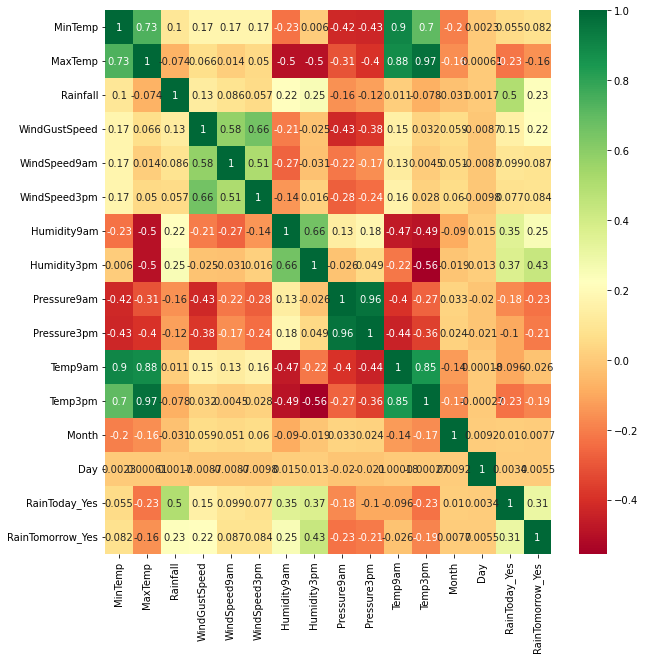

In [28]:
## Data Visualiztion
# 1) Checking correlation
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap= 'RdYlGn', annot=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


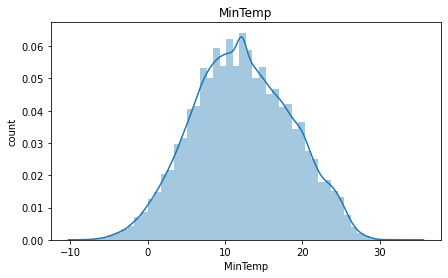

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


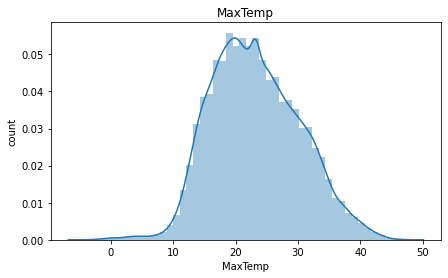

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


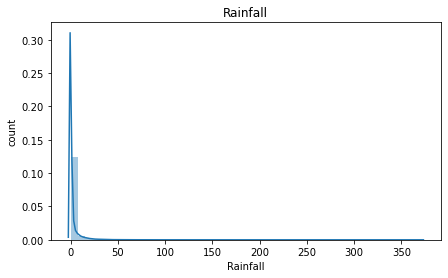

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


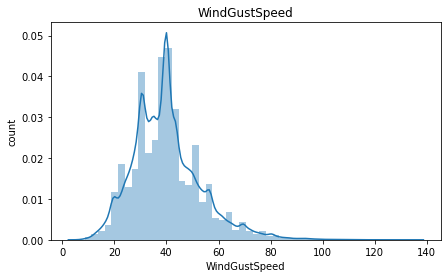

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


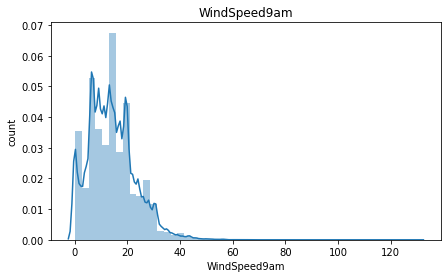

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


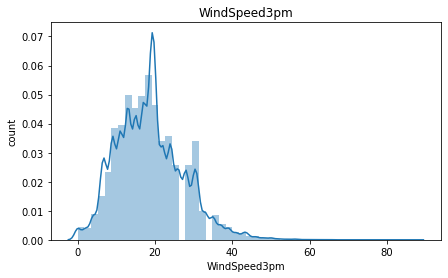

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


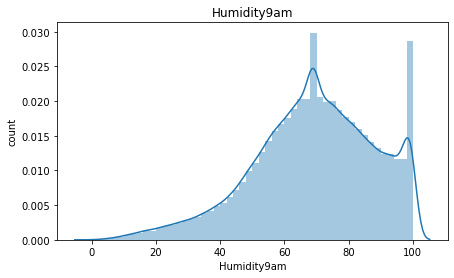

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


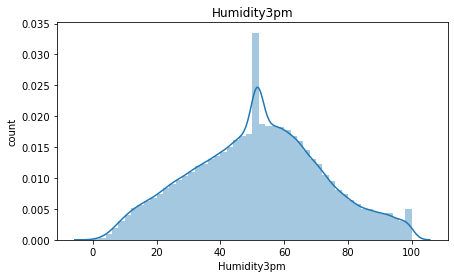

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


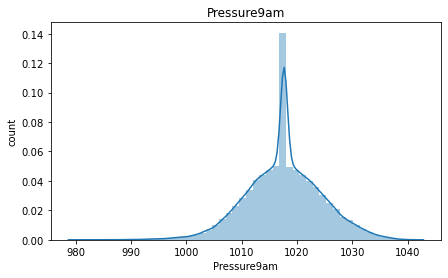

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


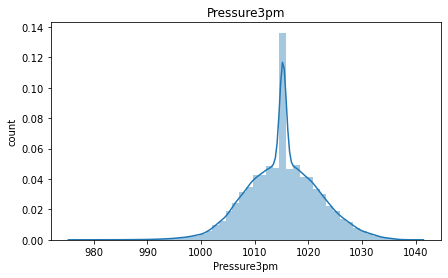

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


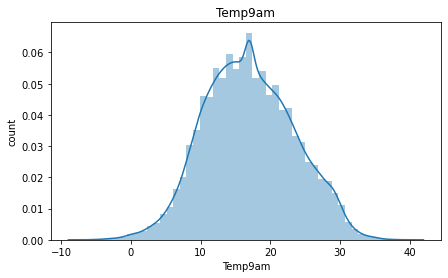

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


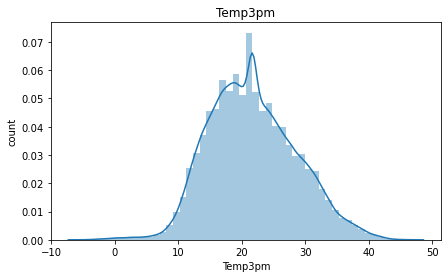

In [29]:
## Checking Data Distribution for numerical data

for feature in data[num_col]:
    plt.figure(figsize=(7,4))
    sns.distplot(a= data[feature])
    plt.title(feature)
    plt.ylabel('count')
    plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X= data.drop("RainTomorrow_Yes", axis=1)
y= data["RainTomorrow_Yes"]

In [32]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [33]:
from category_encoders import MEstimateEncoder

#initializing the mean encoder and adding smoothing
mean_encoder= MEstimateEncoder(m= 800)

In [34]:
new_cat_column= [col for col in data.columns if data[col].dtype=='O']

In [35]:
#transforming categorical columns with mean Encoding
X_train[new_cat_column]= mean_encoder.fit_transform(X_train[new_cat_column], y_train)

In [36]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Month,Day,RainToday_Yes
111548,0.282338,14.5,17.8,14.2,0.250456,40.03523,0.241544,0.204211,0.0,18.662657,94.0,51.539116,1024.1,1022.5,16.2,21.68339,4,24,1
142528,0.184164,24.6,39.5,0.0,0.183420,31.00000,0.241544,0.276082,9.0,17.000000,52.0,21.000000,1011.8,1006.6,30.1,39.20000,10,11,0
65304,0.216498,14.7,26.6,0.2,0.192936,30.00000,0.225640,0.209841,7.0,11.000000,87.0,57.000000,1018.2,1015.4,17.3,24.50000,2,18,0
40651,0.227903,18.3,26.6,0.0,0.183420,28.00000,0.239572,0.191394,11.0,22.000000,79.0,67.000000,1017.0,1016.5,23.0,25.40000,2,18,0
97487,0.216709,11.4,19.3,0.6,0.250456,31.00000,0.225640,0.219228,13.0,19.000000,63.0,47.000000,1018.6,1017.1,14.4,18.30000,10,11,0


In [37]:
from sklearn.ensemble import RandomForestClassifier

model1= RandomForestClassifier(n_estimators=150)

In [38]:
model1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [39]:
model1.score(X_train,y_train)

0.9999828131445071

In [40]:
X_test[new_cat_column]= mean_encoder.transform(X_test[new_cat_column])

In [41]:
model1.score(X_test, y_test)

0.8521586690499107

In [42]:
# Visualizing the model performance
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,classification_report

def model_performance(features_samples,target,model):
    predictions= model.predict(features_samples)
    cm= confusion_matrix(y_true=target, y_pred=predictions)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues', colorbar= False)
    plt.title('Confusion Matrix: Random Forest')
    print(f'{"{:.3f}".format(model.score(features_samples, target))}  accuracy')
    return plt.show()

0.852  accuracy


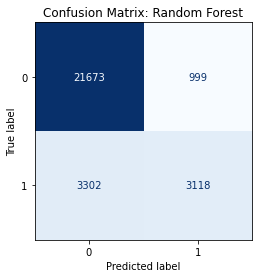

In [43]:
model_performance(model=model1, features_samples= X_test, target= y_test)

In [44]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [45]:
model2= CatBoostClassifier(iterations=500, verbose=False)

In [46]:
model2.fit(X_train, y_train)

0.861  accuracy


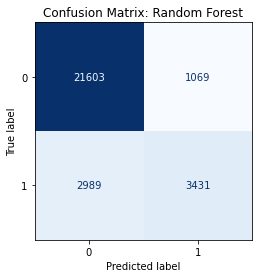

In [47]:
model_performance(model=model2, features_samples= X_test, target= y_test)

In [48]:
xgb= XGBClassifier()

In [49]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

0.857  accuracy


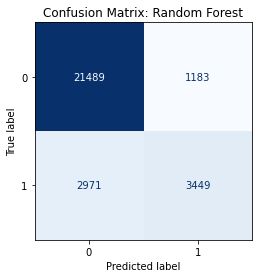

In [50]:
model_performance(model=xgb, features_samples= X_test, target= y_test)

In [51]:
model3= LogisticRegression()

In [52]:
model3.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

0.835  accuracy


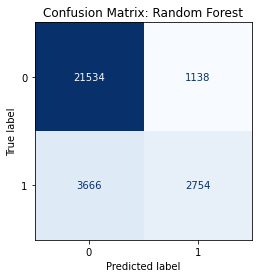

In [53]:
model_performance(model=model3, features_samples= X_test, target= y_test)

In [58]:
import joblib
import pickle

# joblib.dump(model2, 'my_rain_model.joblib')

['my_rain_model.joblib']

In [59]:
# joblib.dump(mean_encoder, 'encoder.joblib')

['encoder.joblib']

In [55]:
new_cat_column

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [56]:
X_train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'Month', 'Day', 'RainToday_Yes'],
      dtype='object')

In [ ]:
data= [{date:1},
      {}]

model2.predict()